<a href="https://colab.research.google.com/github/apester/IME/blob/main/Lab_7_CNN_vs_Dense_Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: CNN vs Dense Networks on MNIST and CIFAR-10

This notebook illustrates the advantages of CNNs compared to dense neural networks using MNIST and CIFAR-10 datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

## MNIST Dataset Comparison

In [2]:
# MNIST data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)
x_train_cnn, x_test_cnn = x_train[..., np.newaxis], x_test[..., np.newaxis]

In [3]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8144 - loss: 0.6638 - val_accuracy: 0.9630 - val_loss: 0.1343
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9577 - loss: 0.1503 - val_accuracy: 0.9707 - val_loss: 0.1085
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9707 - loss: 0.0990 - val_accuracy: 0.9742 - val_loss: 0.0865
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9775 - loss: 0.0744 - val_accuracy: 0.9762 - val_loss: 0.0837
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9829 - loss: 0.0577 - val_accuracy: 0.9783 - val_loss: 0.0767


In [4]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.8451 - loss: 0.5386 - val_accuracy: 0.9763 - val_loss: 0.0814
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9783 - loss: 0.0679 - val_accuracy: 0.9825 - val_loss: 0.0606
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9892 - val_loss: 0.0424
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9875 - val_loss: 0.0462


In [5]:
dense_loss, dense_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)

print(f"Dense Test Accuracy: {dense_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_acc:.4f}")


Dense Test Accuracy: 0.9732
CNN Test Accuracy: 0.9870


In [6]:
dense_model.summary()
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

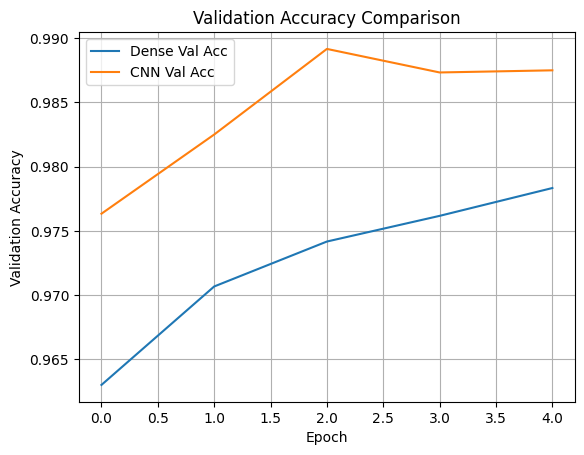

In [7]:
plt.plot(dense_history.history['val_accuracy'], label='Dense Val Acc')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.grid(True)
plt.show()


# Extension Task: Apply CNN vs Dense on CIFAR-10

In [8]:
# CIFAR-10 Comparison: CNN vs Dense Network
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [10]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [11]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [12]:
# Dense Network Model
dense_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train Dense Network
history_dense = dense_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.2595 - loss: 2.1142 - val_accuracy: 0.3754 - val_loss: 1.7522
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.3877 - loss: 1.7169 - val_accuracy: 0.4070 - val_loss: 1.6813
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4225 - loss: 1.6166 - val_accuracy: 0.4358 - val_loss: 1.5940
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.4416 - loss: 1.5517 - val_accuracy: 0.4502 - val_loss: 1.5563
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.4591 - loss: 1.5123 - val_accuracy: 0.4756 - val_loss: 1.4866
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.4816 - loss: 1.4559 - val_accuracy: 0.4736 - val_loss: 1.4840
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.4913 - loss: 1.4244 - val_accuracy: 0.4740 - val_loss: 1.4881
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4990 - loss: 1.4059 - 

In [14]:
# Evaluate Dense Network
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Dense Network Test Accuracy: {dense_test_acc:.4f}")

Dense Network Test Accuracy: 0.4955


In [15]:
# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train CNN
history_cnn = cnn_model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 140ms/step - accuracy: 0.3415 - loss: 1.8198 - val_accuracy: 0.5300 - val_loss: 1.3377
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.5587 - loss: 1.2563 - val_accuracy: 0.6062 - val_loss: 1.1352
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 135ms/step - accuracy: 0.6096 - loss: 1.1228 - val_accuracy: 0.6088 - val_loss: 1.1167
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.6436 - loss: 1.0303 - val_accuracy: 0.6556 - val_loss: 0.9903
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 135ms/step - accuracy: 0.6719 - loss: 0.9544 - val_accuracy: 0.6806 - val_loss: 0.9552
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.6951 - loss: 0.8836 - val_accuracy: 0.6838 - val_loss: 0.9288
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 134ms/step - accuracy: 0.7107 - loss: 0.8377 - val_accuracy: 0.6814 - val_loss: 0.9204
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step - accuracy: 0.7264 - loss: 0

In [17]:
# Evaluate CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

CNN Test Accuracy: 0.6896


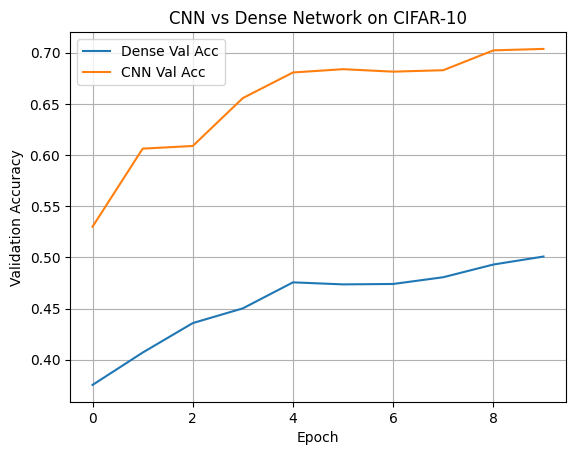


Dense Network Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121,824 (19.54 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,414,550 (13.03 MB)


CNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

In [18]:
# Plot Validation Accuracy Comparison
plt.plot(history_dense.history['val_accuracy'], label='Dense Val Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('CNN vs Dense Network on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()

# Print Parameter Counts
print("\nDense Network Summary:")
dense_model.summary()

print("\nCNN Model Summary:")
cnn_model.summary()
